In [3]:
import tensorflow as tf


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print("After normalization:")
print("Min value:", x_train.min())
print("Max value:", x_train.max())


After normalization:
Min value: 0.0
Max value: 1.0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)
print("Data augmentation is ready")


Data augmentation is ready


In [8]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False
print("Pretrained MobileNetV2 loaded and frozen")

/tmp/ipython-input-1643775942.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Pretrained MobileNetV2 loaded and frozen


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

print("Final model built successfully")


Final model built successfully


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,244 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [10]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully")

Model compiled successfully


In [11]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.2507 - loss: 2.0652 - val_accuracy: 0.3145 - val_loss: 1.9098
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.3015 - loss: 1.9121 - val_accuracy: 0.3261 - val_loss: 1.8887
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.3127 - loss: 1.8817 - val_accuracy: 0.3308 - val_loss: 1.8658
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3211 - loss: 1.8657 - val_accuracy: 0.3390 - val_loss: 1.8408
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3242 - loss: 1.8600 - val_accuracy: 0.3431 - val_loss: 1.8342
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3285 - loss: 1.8417 - val_accuracy: 0.3463 - val_loss: 1.8182
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.3418 - loss: 1.8258 - val_accuracy: 0.3453 - val_loss: 1.8208
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.3371 - loss: 1.8270 - val_accura

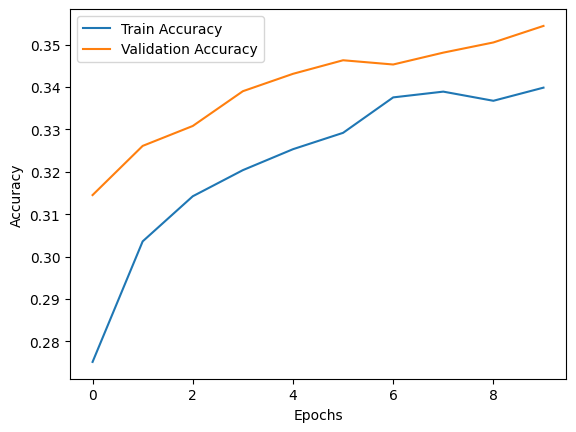

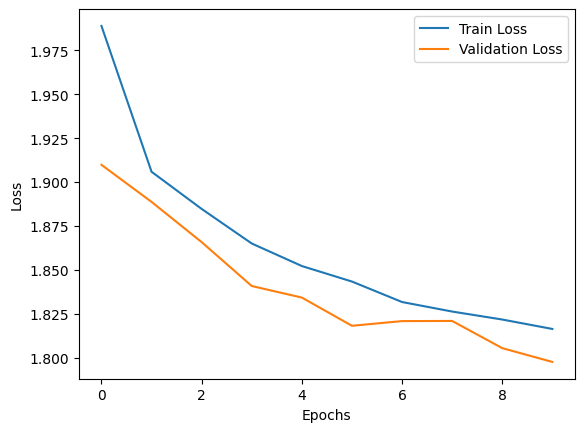

In [12]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.3567 - loss: 1.7969
Test Accuracy: 0.35440000891685486


In [14]:
model.save("image_classifier_model.h5")
print("Model saved successfully")


Model saved successfully


In [15]:
import numpy as np

img = x_test[0]
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_id = np.argmax(prediction)
confidence = np.max(prediction) * 100

print("Predicted class ID:", class_id)
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class ID: 9
Confidence: 31.00%


In [16]:
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load saved model
model = load_model("image_classifier_model.h5")

# Upload image(s)
uploaded = files.upload()

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    preds = model.predict(x)
    class_idx = np.argmax(preds)
    confidence = np.max(preds) * 100

    print(f"Predicted Class: {class_idx}, Confidence: {confidence:.2f}%")

Saving Screenshot 2025-11-11 203001.png to Screenshot 2025-11-11 203001.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 0, Confidence: 45.50%
